# Linear Regression

# 1. Basic

### 1.1 Linear Regression Đơn Giản

In [5]:
import pandas as pd

data = {
    'hours_studied': [2, 3, 4, 5, 6],
    'scores': [50, 60, 65, 70, 80]
}

df = pd.DataFrame(data)
df

,hours_studied,scores
0,2,50
1,3,60
2,4,65
3,5,70
4,6,80


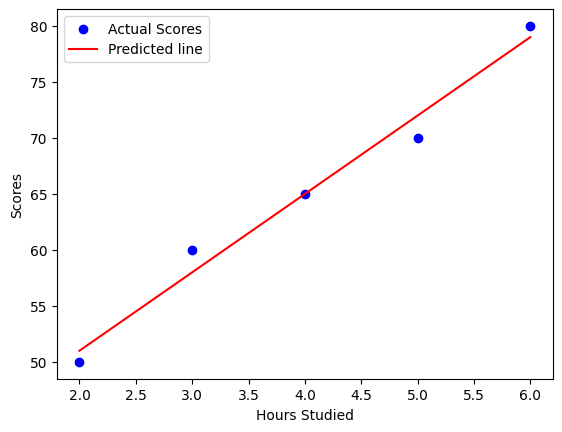

Coefficient (slope): [7.]
Intercept: [37.]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Tạo mô hình Linear Regression
model = LinearRegression()

# Chia dữ liệu thành biến độc lập và phụ thuộc
X = df[['hours_studied']].values
y = df[['scores']].values

# Huấn luyện mô hình
model.fit(X, y)

# Dự đoán
predictions = model.predict(X)

# Vẽ đồ thị
plt.scatter(X, y, color="blue", label="Actual Scores")
plt.plot(X, predictions, color="red", label="Predicted line")
plt.xlabel('Hours Studied')
plt.ylabel("Scores")
plt.legend()
plt.show()

print(f"Coefficient (slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

## 1.2 Multiple Linear Regression
### Mục tiêu: Dự đoán điểm thi dựa trên số giờ học và số giờ ngủ.

In [11]:
data = {
    'hours_studied': [2, 3, 4, 5, 6],
    'hours_slept': [6, 5, 7, 8, 5],
    'scores': [50, 60, 65, 70, 80]
}

df = pd.DataFrame(data)
df

,hours_studied,hours_slept,scores
0,2,6,50
1,3,5,60
2,4,7,65
3,5,8,70
4,6,5,80


In [12]:
# Tạo mô hình Multiple Linear Regression
model = LinearRegression()

# Chia dữ liệu thành biến độc lập và phụ thuộc
X = df[['hours_studied', 'hours_slept']].values
y = df['scores'].values

# Huấn luyện mô hình
model.fit(X, y)

# Dự đoán
predictions = model.predict(X)

# In hệ số
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [ 7.10447761 -1.04477612]
Intercept: 43.05970149253729


## 1.3 Polynomial Regression
### Mục tiêu: Dự đoán điểm thi dựa trên số giờ học với mô hình phi tuyến.

In [14]:
data = {
    'hours_studied': [1, 2, 3, 4, 5, 6, 7, 8],
    'scores': [20, 30, 50, 65, 70, 75, 85, 90]
}

df = pd.DataFrame(data)
df

,hours_studied,scores
0,1,20
1,2,30
2,3,50
3,4,65
4,5,70
5,6,75
6,7,85
7,8,90


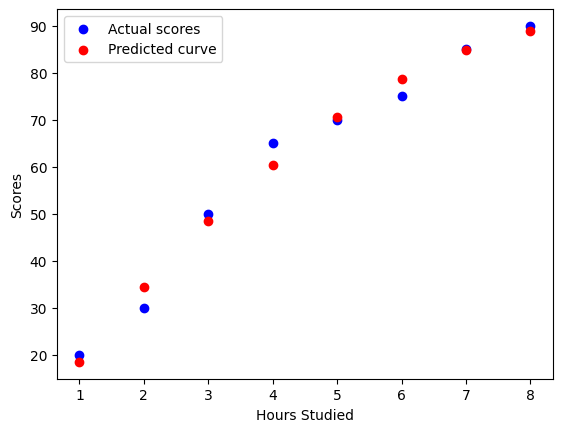

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Tạo mô hình Polynomial Regression với bậc 2
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Chia dữ liệu thành biến độc lập và phụ thuộc
X = df[['hours_studied']].values
y = df['scores'].values

# Huấn luyện mô hình
model.fit(X, y)

# Dự đoán
predictions = model.predict(X)

# Vẽ đồ thị
plt.scatter(X, y, color='blue', label='Actual scores')
plt.scatter(X, predictions, color='red', label='Predicted curve')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.show()

## 1.4 Lasso và Ridge Regression
### Mục tiêu: Sử dụng Lasso và Ridge để giảm thiểu overfitting

In [16]:
data = {
    'hours_studied': [2, 3, 4, 5, 6, 7],
    'hours_slept': [6, 5, 7, 8, 5, 6],
    'scores': [50, 60, 65, 70, 80, 90]
}

df = pd.DataFrame(data)
df

,hours_studied,hours_slept,scores
0,2,6,50
1,3,5,60
2,4,7,65
3,5,8,70
4,6,5,80
5,7,6,90


In [17]:
from sklearn.linear_model import Lasso, Ridge

# Chia dữ liệu thành biến độc lập và phụ thuộc
X = df[['hours_studied', 'hours_slept']].values
y = df['scores'].values

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X, y)
print(f"Lasso Coefficients: {lasso_model.coef_}")

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X, y)
print(f"Ridge Coefficients: {ridge_model.coef_}")

Lasso Coefficients: [ 7.56787696 -1.07569831]
Ridge Coefficients: [ 7.56097227 -1.14622396]


## 1.5 Đánh Giá Mô Hình
### Mục tiêu: Sử dụng Mean Squared Error (MSE) để đánh giá mô hình.

In [19]:
data = {
    'hours_studied': [2, 3, 4, 5, 6],
    'scores': [50, 60, 65, 70, 80]
}

df = pd.DataFrame(data)
df

,hours_studied,scores
0,2,50
1,3,60
2,4,65
3,5,70
4,6,80


In [21]:
from sklearn.metrics import mean_squared_error

X = df[['hours_studied']].values
y = df['scores'].values

# Dự đoán
predictions = model.predict(X)

# Tính toán MSE
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 79.08110119047537


# 2. Hard

## 1. Multiple Linear Regression with Feature Engineering

In [48]:
import pandas as pd
import numpy as np

# Tạo dữ liệu giả
data = {
    'square_feet': [1500, 1600, 1700, 1800, 1900, 2000],
    'bedrooms': [3, 3, 4, 4, 5, 5],
    'age': [10, 15, 20, 5, 2, 1],  # Tuổi nhà
    'location': ['A', 'B', 'A', 'B', 'A', 'B'],
    'price': [300000, 320000, 350000, 400000, 450000, 500000]
}

df = pd.DataFrame(data)

# Chuyển đổi biến phân loại thành biến nhị phân
df = pd.get_dummies(df, columns=['location'], drop_first=True)
df

,square_feet,bedrooms,age,price,location_B
0,1500,3,10,300000,False
1,1600,3,15,320000,True
2,1700,4,20,350000,False
3,1800,4,5,400000,True
4,1900,5,2,450000,False
5,2000,5,1,500000,True


In [49]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Chia dữ liệu thành biến độc lập (X) và biến phụ thuộc (y)
X = df.drop('price', axis=1)
y = df['price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Tạo mô hình Multiple Linear Regression
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán
predictions = model.predict(X_test)

# Kết quả
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Đánh giá mô hình

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Coefficients: [ 4.99990000e+02  1.99996000e+00 -1.62181379e-12  9.99980000e-01]
Intercept: -499991.0001799966
Mean Squared Error: 1449999999.9999943
R^2 Score: -13.499999999999943


## Polynomial Regression with Cross-Validation

In [54]:
import numpy as np
import pandas as pd

data = {
    'hours_studied': [1, 2, 3, 4, 5, 6],
    'scores': [40, 50, 60, 70, 80, 90]
}

# Tạo dữ liệu phi tuyến
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = 2 * (X ** 2) + np.random.randn(80, 1)

df = pd.DataFrame(np.hstack((X, y)), columns=['hours_studied', 'scores'])
df

,hours_studied,scores
0,0.093949,-0.795493
1,0.101092,-1.705843
2,0.195939,0.254210
3,0.301127,-0.220426
4,0.355180,-1.377892
...,...,...
75,4.818314,46.223997
76,4.882297,48.069661
77,4.883805,46.610050
78,4.893092,46.393435


Cross-Validation Scores: [0.29193516 0.86830313 0.86478226 0.93795434 0.97941851]
Mean Score: 0.7884786795742518


C:\Users\QUOC NHAT\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


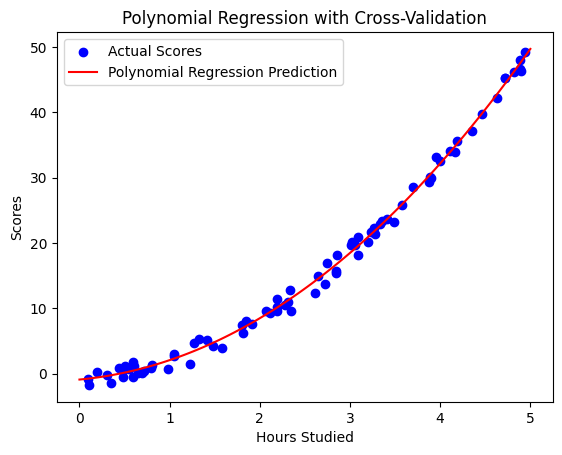

In [55]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Tạo mô hình Polynomial Regression
degree = 3  # Chọn bậc 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Đánh giá mô hình bằng Cross-Validation
scores = cross_val_score(model, df[['hours_studied']], df['scores'], cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Score: {scores.mean()}")

# Huấn luyện mô hình
model.fit(df[['hours_studied']], df['scores'])

# Vẽ đồ thị

X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

plt.scatter(df['hours_studied'], df['scores'],
            color='blue', label='Actual Scores')
plt.plot(X_test, y_pred, color='red', label='Polynomial Regression Prediction')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Polynomial Regression with Cross-Validation')
plt.legend()
plt.show()